## Task 22 - Image Processing : Practical Task 1

In [49]:
# Import the required libraries 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from skimage import exposure


In [50]:
# Load the MNIST dataset
digits = load_digits()

In [51]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [52]:
# Preparing the data for processing
X, y = digits.data, digits.target

In [53]:
# Reshape the images for preprocessing 
X = X.reshape(-1, 8, 8)

Let's pre-process the images to increase the contrast and this will help to improve the predictions correctly

In [54]:
# Preprocess the images
X_preprocessed = []
for image in X:
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Flatten the preprocessed image
    img_flat = img_rescale.flatten()
    X_preprocessed.append(img_flat)

In [55]:
# Let's convert the arary to get it processed in model
X_preprocessed = np.array(X_preprocessed)

Now we have to split the dataset into two sets ie., training and testing set:

- Training set : This set is required to train our RandomForest model for the feature and target
- Testing test : This set is required to verify the whether the model will perform well with the unseen data to predict the target

In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size = 0.2, random_state = 42)

In [57]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [58]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

Let's tune few hyperparameters and use GridSearchCV to find the best estimator:

We will increase the n_estimators to get the best formance of the model. This parameter will decide the number of trees in the random forest.
Also, max_depth we will tune to decide max depth of the tree and min_samples_split to decide the number of samples in the the leaf node.


In [60]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [61]:
# Train the classifier with the best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [62]:
# Make predictions using the best classifier
y_pred_best = best_rf_classifier.predict(X_test)

Now let's look at confusion matrix of the model for the test set to see where the model struggles

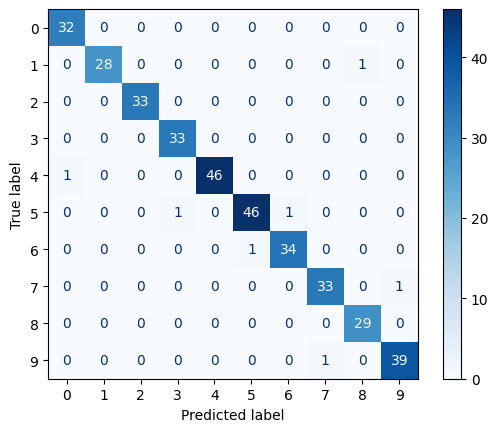

In [63]:
# Heatmap for confusion matrix using scikit-learn
cm = confusion_matrix(y_pred_best, y_test)

# sns.heatmap to get the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Blues')

As you can see above, the model struggles to classify the image of digit 5 and it misclassfied couple of times.

Also, it struggled on few observations for images 1, 4, 7 & 9.

Now we will see performance metrics below:

In [64]:
# Evaluate the performance of the best classifier
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


Now, we will see the classificaion report below to see more details:

In [65]:
# Print the classification report to see the details
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



As you can see above precision score for 5 is only 96 percent.

Let visualize few sample images below to compare predicted with actuals:

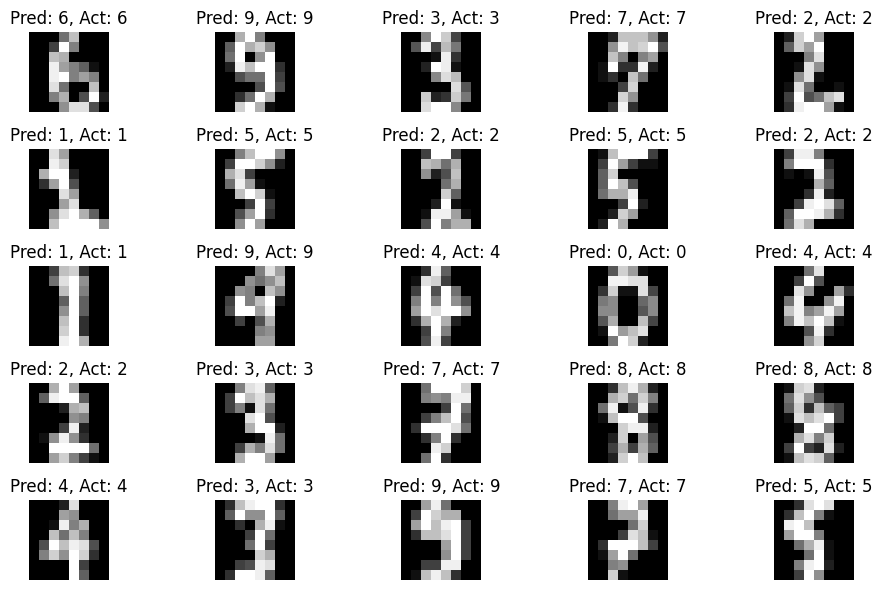

In [66]:
# Visualize some sample images and their predicted as well actual labels
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    image = X_test[i].reshape(8, 8)
    predicted_label = y_pred_best[i]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Pred: {predicted_label}, Act: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()